In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from etl import ETL
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [3]:
metadata_path = '/usr/src/covid_prediction/our-world-in-data-covid19-dataset/owid-covid-data.csv'
vac_path = '/usr/src/covid_prediction/covid-vaccination-dataset/vaccinations.csv'
etl = ETL(metadata_path, vac_path)
df = etl.run()

In [4]:
x = df[['iso_code', 'continent', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred', 'new_vaccinations_smoothed_per_million', 'new_people_vaccinated_smoothed', 'new_people_vaccinated_smoothed_per_hundred', 'stringency_index', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand', 'life_expectancy', 'human_development_index', 'year', 'day', 'month']]
#x = df[['total_vaccinations']]
y = df['new_deaths']

In [5]:
y.shape

(944,)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=66)

In [7]:
#regressor = SVR(kernel='rbf')
#regressor.fit(x_train,y_train)
log_reg = RandomForestRegressor()
log_reg.fit(x_train, y_train)

RandomForestRegressor()

In [8]:
y_pred = log_reg.predict(x_test)

In [9]:
y_pred

array([  0.  ,  81.8 , 141.91,   0.  ,   0.  ,  56.68,   0.  ,  93.79,
        34.27,   0.  ,   2.04, 231.31,  22.98,   0.  ,  29.01,  29.97,
         0.  ,   0.  ,   0.  , 179.26, 132.3 ,   0.  ,  18.  ,  72.62,
        94.81,  16.93, 132.35,  48.52,   0.  ,   0.  ,  20.99, 100.23,
        22.1 ,   1.  , 128.  ,   0.  ,  12.14,   0.  ,   0.  ,  39.43,
         0.  ,  36.32, 215.38,  62.55,   0.  ,   2.96,  29.94,  84.1 ,
         0.  ,  20.03,  22.96,   0.  ,   0.  ,   0.  ,   0.  ,  29.92,
         0.  , 122.53,  48.65,   1.  , 240.8 , 128.01,   0.  ,  37.97,
        32.  ,   0.  ,   0.  ,  41.16,   0.  ,   0.  ,  87.14,   0.  ,
        96.46, 228.38,   0.  ,  44.45,  27.02,  37.05,  14.01,   0.  ,
        12.12,   0.  ,   0.  ,  37.93,  29.07,  19.  ,   0.  ,   0.  ,
        80.31,   0.  ,  27.95,  92.23,   0.  , 143.97, 226.3 ,  24.12,
        19.  ,  53.97,  87.33,  50.51,   3.  ,  37.84,   0.  ,   0.  ,
        78.09,  87.87,  15.88,  12.69,   0.  , 188.23,   1.  ,   0.  ,
      

In [10]:
print("Accuracy on Traing set: ",log_reg.score(x_train,y_train))
print("Accuracy on Testing set: ",log_reg.score(x_test,y_test))

Accuracy on Traing set:  0.9999036124061972
Accuracy on Testing set:  0.9996031942530053


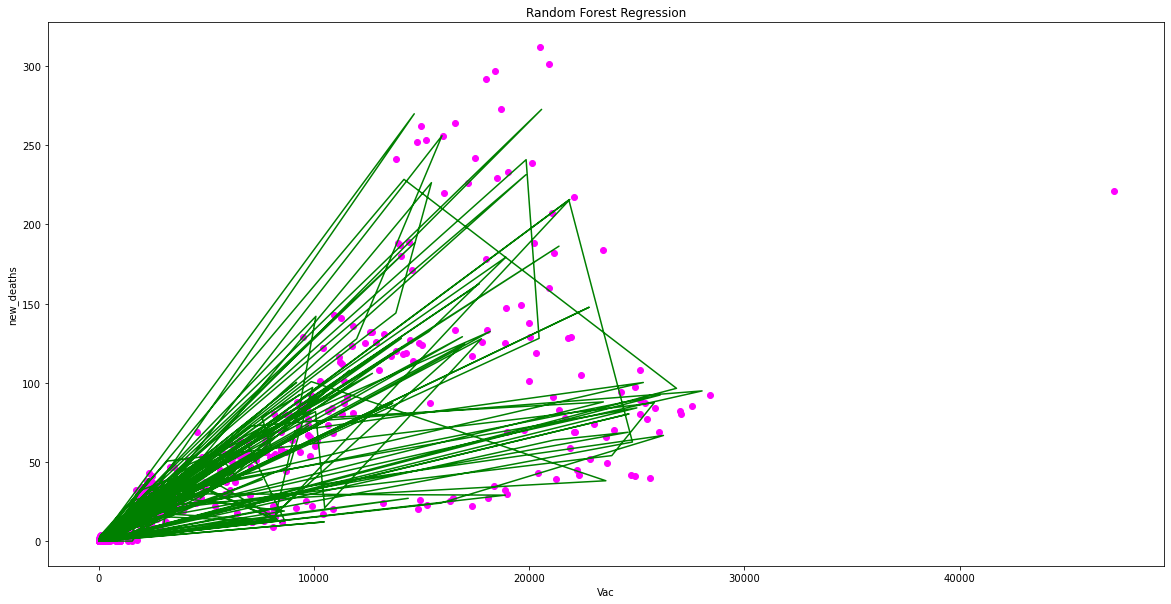

In [11]:
plt.figure(figsize=(20, 10))
plt.scatter(x_train['new_cases'], y_train, color = 'magenta')
plt.plot(x_test['new_cases'], y_pred, color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('Vac')
plt.ylabel('new_deaths')
plt.show()

In [12]:
x_train

,iso_code,continent,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,...,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,year,day,month
221,3166,142,3356.0,5.0,4.000,58.0,0.0,0.000,46.871,0.070,...,7.04,1.9,38.8,90.67,2.1,77.15,0.777,2020,12,8
188,3166,142,3202.0,0.0,3.143,58.0,0.0,0.000,44.720,0.000,...,7.04,1.9,38.8,90.67,2.1,77.15,0.777,2020,10,7
155,3166,142,3112.0,8.0,4.429,58.0,0.0,0.143,43.463,0.112,...,7.04,1.9,38.8,90.67,2.1,77.15,0.777,2020,7,6
936,3166,142,4586550.0,2480.0,2237.857,31327.0,37.0,32.714,64056.974,34.636,...,7.04,1.9,38.8,90.67,2.1,77.15,0.777,2022,28,7
897,3166,142,4499044.0,1892.0,2025.857,30467.0,22.0,19.000,62834.842,26.424,...,7.04,1.9,38.8,90.67,2.1,77.15,0.777,2022,19,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,3166,142,2988.0,1.0,7.143,54.0,0.0,0.000,41.731,0.014,...,7.04,1.9,38.8,90.67,2.1,77.15,0.777,2020,5,5
51,3166,142,35.0,0.0,0.000,0.0,0.0,0.000,0.489,0.000,...,7.04,1.9,38.8,90.67,2.1,77.15,0.777,2020,24,2
631,3166,142,1561638.0,12353.0,12165.857,16268.0,125.0,129.286,21810.251,172.525,...,7.04,1.9,38.8,90.67,2.1,77.15,0.777,2021,26,9
828,3166,142,3905872.0,22387.0,24197.857,26188.0,105.0,96.571,54550.445,312.663,...,7.04,1.9,38.8,90.67,2.1,77.15,0.777,2022,11,4


In [13]:
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

print("Accuracy on Traing set: ",linear_reg.score(x_train,y_train))
print("Accuracy on Testing set: ",linear_reg.score(x_test,y_test))
y_pred_linear = linear_reg.predict(x_test)

Accuracy on Traing set:  1.0
Accuracy on Testing set:  1.0


In [14]:
y_pred_linear

array([ 1.09158885e-09,  8.20000000e+01,  1.41000000e+02,  8.79183213e-10,
        2.39590671e-09,  5.70000000e+01,  1.17465802e-09,  9.40000000e+01,
        3.40000000e+01,  1.51239620e-09,  2.00000000e+00,  2.35000000e+02,
        2.30000000e+01,  3.10375628e-09,  2.90000000e+01,  3.00000000e+01,
        1.31839435e-09,  2.26575290e-09,  1.66761114e-09,  1.78000000e+02,
        1.29000000e+02,  2.39061531e-09,  1.80000000e+01,  7.50000000e+01,
        9.60000000e+01,  1.70000000e+01,  1.35000000e+02,  4.90000000e+01,
        1.90408961e-09,  2.72431921e-09,  2.10000000e+01,  9.80000000e+01,
        2.20000000e+01,  1.00000000e+00,  1.29000000e+02, -5.34849982e-10,
        1.20000000e+01,  3.46135784e-10,  6.08128382e-10,  4.00000000e+01,
        2.72316079e-09,  3.60000000e+01,  2.12000000e+02,  6.30000000e+01,
        1.30218417e-09,  2.00000000e+00,  3.00000000e+01,  8.40000000e+01,
       -1.13507349e-09,  2.00000000e+01,  2.30000000e+01,  3.35284194e-09,
        1.85126881e-09, -

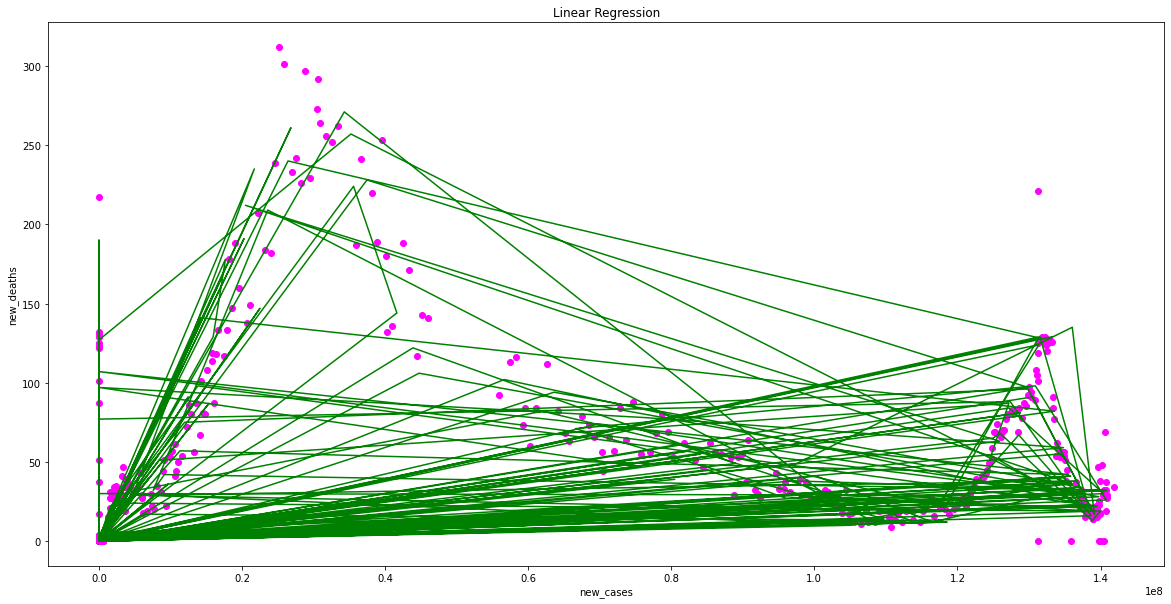

In [23]:
plt.figure(figsize=(20, 10))
plt.scatter(x_train['total_vaccinations'], y_train, color = 'magenta')
plt.plot(x_test['total_vaccinations'], y_pred_linear, color = 'green')
plt.title('Linear Regression')
plt.xlabel('new_cases')
plt.ylabel('new_deaths')
plt.show()

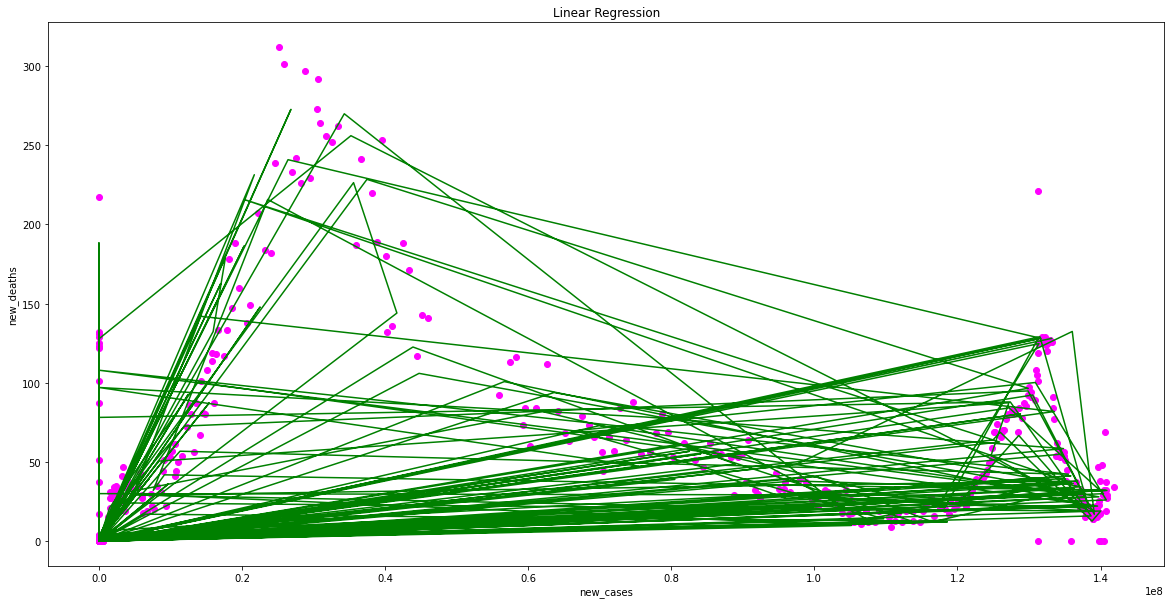

In [24]:
plt.figure(figsize=(20, 10))
plt.scatter(x_train['total_vaccinations'], y_train, color = 'magenta')
plt.plot(x_test['total_vaccinations'], y_pred, color = 'green')
plt.title('Linear Regression')
plt.xlabel('new_cases')
plt.ylabel('new_deaths')
plt.show()